In [13]:
import pandas as pd           # For working with data (tables)
import numpy as np            # For numerical operations
from sklearn.preprocessing import StandardScaler   # For normalizing data
from sklearn.decomposition import PCA              # For reducing data dimensions
from sklearn.cluster import KMeans, DBSCAN         # Clustering algorithms
import matplotlib.pyplot as plt                    # For creating plots
import seaborn as sns                             # For easier data plots


In [14]:
df = pd.read_csv('/student_data.csv')  # Replace with correct filename or URL
df.head()                             # Shows the first few rows of your data


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
features = ['math score', 'reading score', 'writing score']  # ✓ Correct for your dataset
X = df[features] # Select the features from the DataFrame and create X

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [21]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster'] = dbscan.fit_predict(X_scaled)


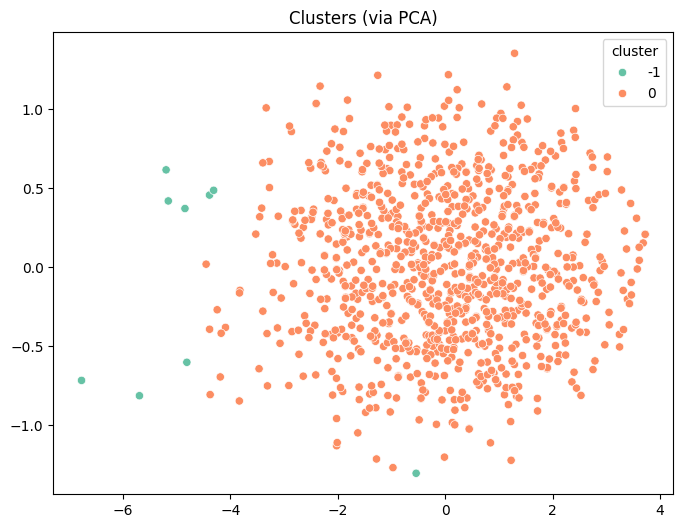

In [23]:
import os

# Create the 'visualizations' directory if it doesn't exist
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set2')
plt.title('Clusters (via PCA)')
plt.savefig('visualizations/cluster_scatter.png')
plt.show()

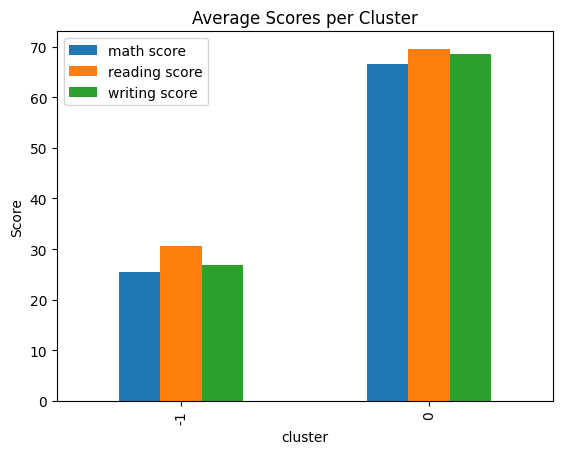

In [25]:
df.groupby('cluster')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar')
plt.title('Average Scores per Cluster')
plt.ylabel('Score')
plt.savefig('visualizations/cluster_profile_bar.png')
plt.show()


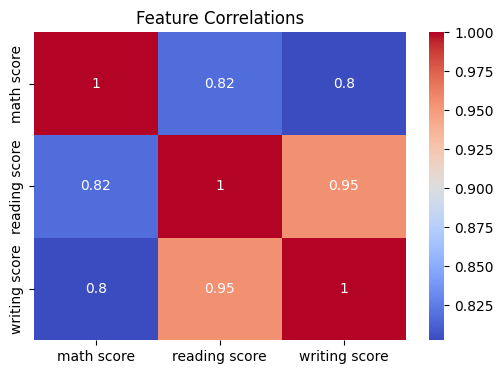

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.savefig('visualizations/correlation_heatmap.png')
plt.show()
